# Exercise 1 Task 3

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Math
import pandas as pd

plt.style.use("default")

# Task A

(-0.01, 0.25934999999999964)

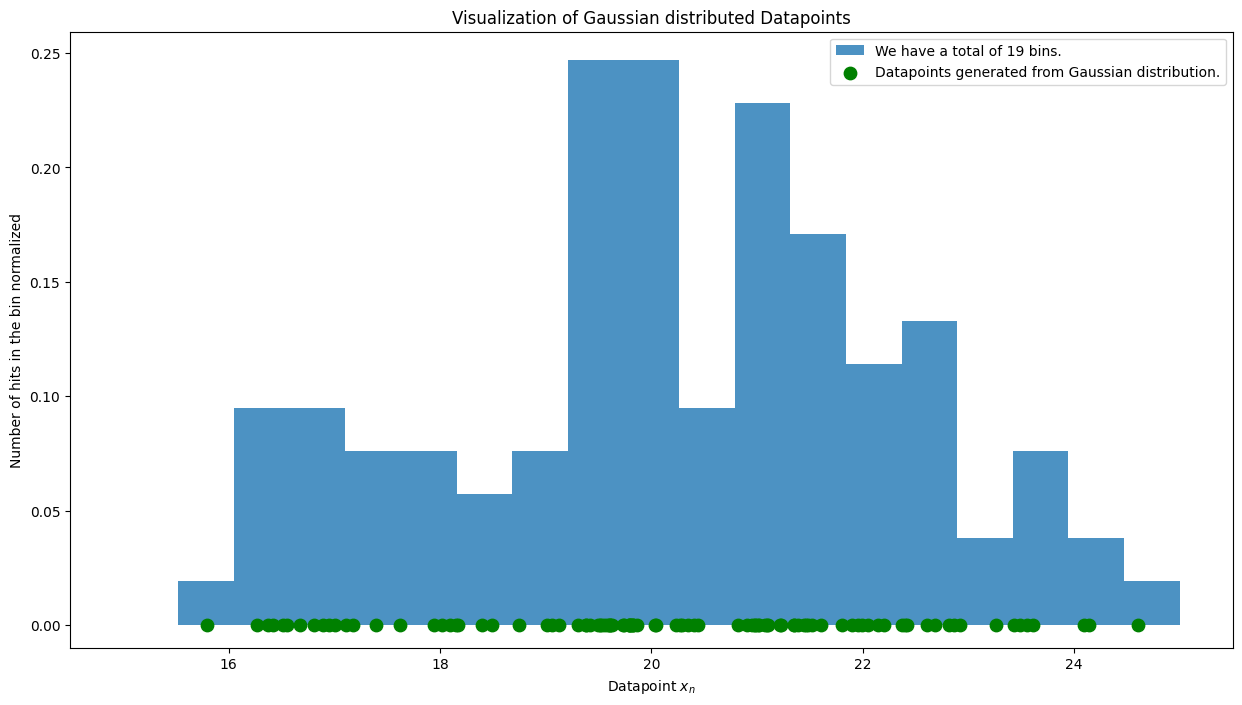

In [82]:
fig, ax = plt.subplots(1,1, figsize = (15,8))

gaussian_samples = np.random.normal(loc=20, scale=2, size=100)
y=np.zeros(len(gaussian_samples))

# Create histogram of the distributed datapoints
# Round to nearest integer
hist_left = np.floor(np.min(gaussian_samples))
hist_right = np.ceil(np.max(gaussian_samples))
num_hist = int((hist_right - hist_left)*2)
bins = np.linspace(hist_left, hist_right, num_hist)

# Creates the histogram of gaussian_samples according to "bins"
ax.scatter(gaussian_samples, y, c="g", zorder=10, s=80, label="Datapoints generated from Gaussian distribution.")
ax.hist(gaussian_samples, bins, alpha = 0.8, density=True, label=f"We have a total of {len(bins)-1} bins.")

# 
ax.set_xlabel("Datapoint $x_n$")
ax.set_ylabel("Number of hits in the bin normalized")
ax.set_title("Visualization of Gaussian distributed Datapoints")
ax.legend()
ax.set_ylim(bottom=-0.01)

# Task B

In [83]:
# Compute Maximum Log Likelihood parameters for the datapoints
mu = 1/len(gaussian_samples)*np.sum(gaussian_samples)
sigma_squared = 1/len(gaussian_samples)*np.sum((gaussian_samples-mu)**2)
display(Math(r'Correct\ parameters:\ \mu={:.3f}\ and\ \sigma^2={:.3f}'.format(20, 4)))
display(Math(r'Computed\ parameters\ at\ N=100:\ \mu={:.3f}\ and\ \sigma^2={:.3f}'.format(mu, sigma_squared)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Task C
## We do not get the exact results because the computed parameters with the maximum log likelihood function is actually a computation with the sampling formula. Both approaches result in the same formula and the sampling formula is only an approximation with N datapoints.

# Task D
## On average, the more datapoints you have, the better the estimated parameters. Certainly it is possible that a simulation with fewer datapoints results in a better parameter approximation but on average more datapoints results in better estimations. 
## It seems that espectation value $\mu$ is not affected by the number of samples as much as the standard deviation.

In [84]:
results = [] 
for n_samples in [3, 5, 10, 50, 70, 100, 150, 250, 500, 1000, 5000, 10000, 50000, 100000]:
    gaussian_samples = np.random.normal(loc=20, scale=2, size=n_samples)
    mu = 1/len(gaussian_samples)*np.sum(gaussian_samples)
    sigma_squared = 1/len(gaussian_samples)*np.sum((gaussian_samples-mu)**2)

    results.append({"N_samples": n_samples, "mean": mu, 
                    "std squared": sigma_squared})
df_results = pd.DataFrame(results)
df_results = df_results.set_index("N_samples")
df_results

,mean,std squared
N_samples,,
3,21.173022,3.775418
5,19.424326,5.616439
10,20.212347,4.174615
50,19.720706,2.759251
70,19.891633,3.773514
100,20.154689,2.653187
150,20.086728,3.521250
250,19.995986,3.650498
500,19.949967,3.829200
